In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## New gene-ccl dataset

#### Cell populations and labels

File which represents how well each cell population reacted to each drug. 

1. How is the drug measured?

    a. **IC50:** describes the concentration of an inhibitor that results in a half-maximal inhibition of a response (i.e. the concentration that reduces a response to 50% of its maximum). That maximum response being inhibited is due to the action of something else (typically an agonist for the receptor of interest). Maximum IC50 = 8. Minimum IC50 = 0.
    
    b. **EC50:** conceptually similar but more inclusive. EC50 can be used for both the inhibition of responses (by an inhibitor) but it is more commonly used to describe the stimulation of responses (such as with an agonist). EC50 is the concentration that results in a 50% change in response, in either direction. In general, these terms are often used interchangeably. The main difference is that the IC50 relies on inhibition of a maximal response that was generated by a specific agonist. The IC50 is therefore relative to the specific agonist that was used to generate the response - each agonist could very well generate a different maximal response that can be inhibited by your antagonist.
    
    c.	**Amax:** maximum activity (from all activities measured).
    
    d.	**ActArea:** "*Sensitivity was assayed by measuring cellular ATP levels as a surrogate  for cell number and growth. Raw data were merged with assay metadata, and percent-viability scores were calculated relative to DMSO controls, after which concentration-response curves were fit for percent viability. The areas under percent-viability curves were computed and used as the measure of sensitivity*". In one paper, the limit was set to **0.8 SD**. Sensitive cell lines were the ones with an activity area at least 0.8 SD above the mean. Resistant cell lines had an activity area at least 0.8 SD below the mean. All other samples were discared. **High activity area corresponds to low IC50.** How?
    


In [3]:
responses = pd.read_csv("data/CCLE/CCLE_NP24.2009_Drug_data_2015.02.24.csv")
responses

,CCLE Cell Line Name,Primary Cell Line Name,Compound,Target,Doses (uM),Activity Data (median),Activity SD,Num Data,FitType,EC50 (uM),IC50 (uM),Amax,ActArea
0,1321N1_CENTRAL_NERVOUS_SYSTEM,1321N1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.67,11.0,2.16,.27,-10,-13,-26,-43","3.31,3.72,5.36,4.67,13.1,.18,2.42,7.51",8,Sigmoid,8.717774,8.000000,-42.558014,0.71240
1,22RV1_PROSTATE,22Rv1,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8",".94,12.5,-14,4.16,-25,-32,-52,-71","1.95,13.3,6.98,21.8,16.0,18.8,4.84,7.93",8,Sigmoid,8.165164,2.329924,-71.589340,1.67230
2,42MGBA_CENTRAL_NERVOUS_SYSTEM,42-MG-BA,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","8.91,8.39,-3.5,12.4,-.55,-6.2,-48,-63","13.7,7.70,11.1,6.43,24.0,9.57,9.57,10.4",8,Sigmoid,1.514508,2.682130,-63.491371,1.18520
3,5637_URINARY_TRACT,5637,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","2.15,9.91,-3.5,.056,-2.1,-14,-30,-62","4.05,9.75,12.7,4.36,11.0,10.0,24.6,.14",8,Sigmoid,8.006595,5.002314,-62.352776,0.99480
4,639V_URINARY_TRACT,639-V,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","11.8,-7.3,-9.4,-15,-11,-21,-53,-50",".95,5.67,11.1,.68,31.6,22.3,1.45,3.08",8,Sigmoid,0.931196,1.736181,-51.959808,1.54360
5,697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,697,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","18.4,4.65,8.64,19.3,-19,-20,-21,-78","25.4,1.92,15.0,23.1,24.7,13.5,1.26,2.51",8,Sigmoid,8.700655,4.260822,-73.333786,1.76650
6,769P_KIDNEY,769-P,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","2.58,-4.1,6.18,-7.0,-13,-40,-28,-47","18.1,12.4,12.4,5.80,5.24,10.3,6.56,6.84",8,Sigmoid,0.306243,8.000000,-39.688095,1.43760
7,786O_KIDNEY,786-O,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","-1.2,-.53,.55,-4.1,2.41,-11,-8.8,-52","14.5,15.3,7.11,9.90,4.66,3.60,2.58,11.5",8,Sigmoid,5.267667,7.613148,-51.686317,0.59540
8,8305C_THYROID,8305C,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","1.00,-1.9,8.83,9.38,-18,-17,-28,-68","6.49,3.67,4.67,6.24,6.70,3.11,9.45,7.52",8,Sigmoid,8.520771,4.950636,-66.228836,1.29290
9,8505C_THYROID,8505C,AEW541,IGF1R,".0025,.0080,.025,.080,.25,.80,2.53,8","-6.0,-.21,-2.4,6.80,-6.3,1.35,-19,-22",".63,13.0,4.25,6.36,3.61,7.19,6.61,2.70",8,Sigmoid,1.846690,8.000000,-22.268826,0.31890


In [32]:
responses.set_index(["Compound","CCLE Cell Line Name"])

Primary Cell Line Name  \
Compound  CCLE Cell Line Name                                                
AEW541    1321N1_CENTRAL_NERVOUS_SYSTEM                             1321N1   
          22RV1_PROSTATE                                             22Rv1   
          42MGBA_CENTRAL_NERVOUS_SYSTEM                           42-MG-BA   
          5637_URINARY_TRACT                                          5637   
          639V_URINARY_TRACT                                         639-V   
          697_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                       697   
          769P_KIDNEY                                                769-P   
          786O_KIDNEY                                                786-O   
          8305C_THYROID                                              8305C   
          8505C_THYROID                                              8505C   
          8MGBA_CENTRAL_NERVOUS_SYSTEM                             8-MG-BA   
          A172_CENTRAL_NERVOUS_SYSTEM                                 A172   
          A204_SOFT_TISSUE                                           A-204   
          A2058_SKIN                                                 A2058   
          A253_SALIVARY_GLAND                                        A-253   
          A2780_OVARY                                                A2780   
          A375_SKIN                                                  A-375   
          A549_LUNG                                                   A549   
          A673_BONE                                                  A-673   
          ACHN_KIDNEY                                                 ACHN   
          ALLSIL_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                ALL-SIL   
          AMO1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                    AMO-1   
          AN3CA_ENDOMETRIUM                                         AN3 CA   
          ASPC1_PANCREAS                                            AsPC-1   
          AU565_BREAST                                               AU565   
          AZ521_STOMACH                                             AZ-521   
          BCPAP_THYROID                                             B-CPAP   
          BDCM_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                     BDCM   
          BFTC909_KIDNEY                                          BFTC-909   
          BGC823_STOMACH                                           BGC-823   
...                                                                    ...   
Erlotinib TE15_OESOPHAGUS                                            TE-15   
          TE5_OESOPHAGUS                                              TE-5   
          TE617T_SOFT_TISSUE                                      TE 617.T   
          TE9_OESOPHAGUS                                              TE-9   
          TEN_ENDOMETRIUM                                              TEN   
          TOLEDO_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                 Toledo   
          TOV112D_OVARY                                           TOV-112D   
          TOV21G_OVARY                                             TOV-21G   
          TT2609C02_THYROID                                     TT2609-C02   
          TYKNU_OVARY                                               TYK-nu   
          U118MG_CENTRAL_NERVOUS_SYSTEM                           U-118 MG   
          U2OS_BONE                                                 U-2 OS   
          U87MG_CENTRAL_NERVOUS_SYSTEM                             U-87 MG   
          U937_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE                    U-937   
          UACC257_SKIN                                            UACC-257   
          UACC62_SKIN                                              UACC-62   
          UACC812_BREAST                                          UACC-812   
          UMUC3_URINARY_TRACT                                      UM-UC-3   
          VMRCLCD_LUNG                                            VMRC-LCD

In [37]:
#Information

print("Number of drugs: ",len(responses["Compound"].unique()))
print("Number of different cell lines: ", len(responses["CCLE Cell Line Name"].unique()))
print("Number of targets: ", len(responses["Target"].unique()))
print("List of drug compounds:", responses["Compound"].unique())
print("Number of tests: ", len(responses.index))

Number of drugs:  24
Number of different cell lines:  504
Number of targets:  17
List of drug compounds: ['AEW541' 'Nilotinib' '17-AAG' 'PHA-665752' 'Lapatinib' 'Nutlin-3'
 'AZD0530' 'PF2341066' 'L-685458' 'ZD-6474' 'Panobinostat' 'Sorafenib'
 'Irinotecan' 'Topotecan' 'LBW242' 'PD-0325901' 'PD-0332991' 'Paclitaxel'
 'AZD6244' 'PLX4720' 'RAF265' 'TAE684' 'TKI258' 'Erlotinib']
Number of tests:  11670


##### More details about IC50

IC50 is obtained by plotting a measure of the cell death rate vs the concentration of the drug. IC50 is expressed as a concentration so the higher the concentration of drug needed to kill the cell line the more resistant that cell line is. If the IC50 is very low then the concentration (or amount) of drug needed to kill the cell line is also very low which means the cell line is more sensitive. Typically you get a S curve or sigmoidal curve. IC50 is the middle point of the sigmoidal curve. The threshold for calling a drug sensitive/resistant changes depending upon the IC50 value and we need to see how the sigmoidal curve behaves.

area = 2.1208005092592597
area = 1.9480566940637178


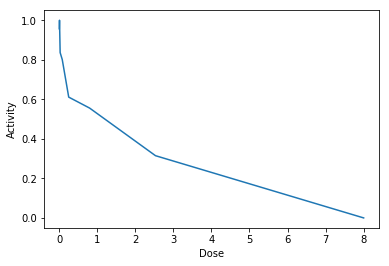

In [96]:
#Dose vs Activity for the first row

from scipy.integrate import simps
from numpy import trapz

dose = np.array([.0025,.0080,.025,.080,.25,.80,2.53,8])
act = np.array([8.67,11.0,2.16,.27,-10,-13,-26,-43])
norm_act = (act - min(act))/(max(act) - min(act))

plt.plot(dose,norm_act)
plt.xlabel("Dose")
plt.ylabel("Activity");

# Compute the area using the composite trapezoidal rule.
area = trapz(norm_act, x = dose)
print("area =", area)

# Compute the area using the composite Simpson's rule.
area = simps(norm_act, x = dose)
print("area =", area)


#### Features corresponding to each cell. 

Features are histone modifications. Histone modifications regulate gene expressions. 

Enhancers\* act to regulate cell type specific gene expression by facilitating the transcription of target genes. For example, monomethylation of Histone H3 at lysine 4 (H3K4me1) commonly marks active enhancers in mammalian cells in a cell-type specific manner.


\*An enhancer is a short region of DNA that can be bound by proteins (activators) to increase the likelihood that transcription of a particular gene will occur.

In [11]:
features = pd.read_csv("data/CCLE/CCLE_GlobalChromatinProfiling_20181130.csv")
features

,CellLineName,BroadID,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,...,H3K27ac1K36me0,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3.3K27me0K36me0,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2
0,DMS53_LUNG,ACH-000698,0.116020,-0.153144,-0.348607,-1.417128,-1.281177,-0.719707,-0.208080,-0.033416,...,0.396178,1.261963,0.492776,-0.211349,-0.554973,-0.222912,-0.310910,-0.272655,0.271469,0.469647
1,SW1116_LARGE_INTESTINE,ACH-000489,-0.058624,0.219592,0.110946,-0.170282,0.334630,0.497303,0.307907,-0.466686,...,-1.198709,-1.394997,-1.123119,-1.501911,-0.180229,-0.075173,NaN,0.051018,0.099032,0.169761
2,NCIH1694_LUNG,ACH-000431,0.480909,0.298440,0.073777,0.413953,-0.479543,0.133280,0.053279,-0.220467,...,0.055683,-0.659294,0.114288,-1.289012,0.280396,0.117564,NaN,0.185984,0.191760,-0.437561
3,P3HR1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000707,-0.079957,-0.617656,-0.566702,0.079932,0.373140,0.159682,0.060946,-0.181112,...,1.098303,0.381884,0.258282,0.751323,0.031194,-0.199316,0.037929,0.003978,-0.225147,-0.061445
4,HUT78_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000509,-0.059965,-0.063483,-0.267980,0.357422,0.075651,0.047830,0.115243,-0.498239,...,-0.185237,0.239421,0.358072,-0.176527,-0.351188,0.037021,NaN,0.045495,-0.153684,-0.106306
5,UMUC3_URINARY_TRACT,ACH-000522,-0.326129,-0.086690,0.713623,0.066648,0.421013,-0.223507,-1.075759,-0.258696,...,-0.850831,-0.791398,-0.790837,0.096298,-0.135126,-0.291408,-0.186947,-0.441485,-0.272371,-0.534437
6,HOS_BONE,ACH-000613,-0.241259,-0.871103,-0.382457,-0.100698,-0.212449,-0.295410,-0.313820,-0.605897,...,-1.324244,-1.765642,-1.717149,-1.974660,-0.435360,0.231246,NaN,-0.095360,-0.532368,-0.391365
7,HUNS1_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000829,0.000765,0.193075,-0.001265,0.172924,0.157647,0.019145,-0.242568,-0.629405,...,0.911651,0.305552,0.191609,0.299686,-0.105317,-0.248224,NaN,0.151529,0.014668,-0.132116
8,AML193_HAEMATOPOIETIC_AND_LYMPHOID_TISSUE,ACH-000557,0.127254,-0.101107,0.197893,-1.028948,0.085119,0.136275,0.406178,-0.140055,...,0.783969,0.733241,0.531269,0.441987,0.869001,0.087314,0.140158,-0.092945,0.209983,0.654700
9,RVH421_SKIN,ACH-000614,0.106098,0.586015,0.407972,NaN,0.331119,0.215084,0.284994,-0.009727,...,0.118951,0.272409,0.037344,-0.168794,-0.009650,0.149911,0.179350,0.172654,0.376768,0.414125


In [94]:
print("Number of cell lines: ", len(features["CellLineName"].unique()))
print("Number of different histone modifications: ", len(features.columns) - 2)
print("How many NaN values do we have per feature column?")
display(pd.DataFrame(features.isnull().sum(axis = 0))[2:].T)
print("Total number of missing values: ", features.isnull().sum().sum())

Number of cell lines:  897
Number of different histone modifications:  42
How many NaN values do we have per feature column?


,H3K4me0,H3K4me1,H3K4me2,H3K4ac1,H3K9me0K14ac0,H3K9me1K14ac0,H3K9me2K14ac0,H3K9me3K14ac0,H3K9ac1K14ac0,H3K9me0K14ac1,...,H3K27ac1K36me0,H3K27ac1K36me1,H3K27ac1K36me2,H3K27ac1K36me3,H3.3K27me0K36me0,H3K56me0,H3K56me1,H3K79me0,H3K79me1,H3K79me2
0,1,0,1,77,0,0,1,2,1,0,...,8,41,11,5,1,0,339,0,5,6


Total number of missing values:  842


#### Drug information

In [21]:
drug_info = pd.read_csv("data/CCLE/CCLE_NP24.2009_profiling_2012.02.20.csv", encoding = "ISO-8859-1")
drug_info.head()

,Compound (code or generic name),Compound (brand name),Target(s),Mechanism of action,Class,Highest Phase,Organization
0,Erlotinib,Tarceva,EGFR,EGFR Inhibitor,Kinase inhibitor,Launched-2004,Genentech
1,Lapatinib,Tykerb,"EGFR, HER2",EGFR and HER2 Inhibitor,Kinase inhibitor,Launched-2007,GlaxoSmithKline
2,PHA-665752,NaN,c-MET,c-MET Inhibitor,Kinase inhibitor,Preclinical,Pfizer
3,PF-2341066,Crizotinib,"c-MET, ALK",c-MET and ALK Inhibitor,Kinase inhibitor,Launched-2011,Pfizer
4,TAE684,NaN,ALK,ALK Inhibitor,Kinase inhibitor,Preclinical,Novartis
